# Project Title
---

Group Name

Team members:
- Abdullah Mohamed
- Abdulrahman Mohammed

## Introduction 
__Introduction to the topic__ 

    ...

---

## Problem Statement

The Olympic Games bring athletes from all over the world, but only a few end up winning medals. In this project we focused on how sex can differ betwe how age, height, and weight set medalists apart from those who don’t.

## Objectives:
__Questions that will guide the analysis to solve the problem__

    ...

---

## Exploratory Data Analysis (EDA):

### Data Info:
__Getting the data and exploring it (includes descriptive statistics)__

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)




In [2]:
tableau_colors = ["#4E79A7", "#F28E2B", "#76B7B2", "#E15759"]

pd.options.display.float_format = "{:,.2f}".format

np.set_printoptions(legacy='1.25')

In [3]:
# Load and Create a DataFrame

# Load datasets
athletes = pd.read_csv("..\\Data\\Original data\\athlete_events.csv")
regions = pd.read_csv("..\\Data\\Original data\\noc_regions.csv")

# Join and Create a DataFrame
olympics_df = athletes.merge(regions, on="NOC", how="left")

In [4]:
#Shape
olympics_df.shape

(271116, 15)

In [5]:
#Data info
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  object 
 5   Weight  208241 non-null  object 
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
 13  region  270746 non-null  object 
 14  notes   5039 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 31.0+ MB


In [6]:
#Data statistics
olympics_df.describe(include='all')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,City,Sport,Event,Medal,region,notes
count,"271,116.00",271116,271116,"261,642.00",210945,208241,271116,271116,271116,271116,271116,271116,39783,270746,5039
unique,NaN,134732,6,NaN,95,220,1184,230,51,42,66,765,3,205,21
top,NaN,Robert Tait McKenzie,male,NaN,180.0cm,70.0kg,United States,USA,2000 Summer,London,Athletics,Football Men's Football,Gold,USA,Yugoslavia
freq,NaN,58,65687,NaN,12492,9625,17847,18853,13821,22426,38624,5733,13372,18853,2583
mean,"68,248.95",NaN,NaN,25.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"39,022.29",NaN,NaN,6.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00,NaN,NaN,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"34,643.00",NaN,NaN,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"68,205.00",NaN,NaN,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"102,097.25",NaN,NaN,28.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Missing Values Count in percentage
olympics_df.isnull().mean() * 100

ID        0.00
Name      0.00
Sex       0.00
Age       3.49
Height   22.19
Weight   23.19
Team      0.00
NOC       0.00
Games     0.00
City      0.00
Sport     0.00
Event     0.00
Medal    85.33
region    0.14
notes    98.14
dtype: float64

In [8]:
#To check for the sex column distribution

olympics_df['Sex'].value_counts()

Sex
male      65687
Male      65570
M         65337
FeMale    25083
Female    24791
F         24648
Name: count, dtype: int64

In [9]:
#To check for the Medal column distribution with the nulls

olympics_df['Medal'].value_counts(dropna=False)

Medal
NaN       231333
Gold       13372
Bronze     13295
Silver     13116
Name: count, dtype: int64

In [10]:
#Top 5 NOC
olympics_df['NOC'].value_counts().head(5)

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

In [11]:
# To Check for duplicates
olympics_df.duplicated(subset=['ID','Games']).sum()


83664

### Data Handling: 
__Cleaning, transforming, and combining data__

In [12]:
# Rename 'region' to 'Country' for clarity
olympics_df.rename(columns={'region': 'Country'}, inplace=True)

print(olympics_df[['NOC','Country']].head())

   NOC      Country
0  CHN        China
1  CHN        China
2  DEN      Denmark
3  DEN      Denmark
4  NED  Netherlands


In [13]:
# Standardizing the sex varaints into two Male and Female

olympics_df['Sex'] = olympics_df['Sex'].replace(['M', 'male'], 'Male')
olympics_df['Sex'] = olympics_df['Sex'].replace(['F', 'FeMale'], 'Female')
olympics_df['Sex'].value_counts()

Sex
Male      196594
Female     74522
Name: count, dtype: int64

In [14]:
# Clean Height and Weight columns 
olympics_df['Height'] = olympics_df['Height'].astype(str).str.replace('cm','').str.strip()
olympics_df['Weight'] = olympics_df['Weight'].astype(str).str.replace('kg','').str.strip()


olympics_df['Year'] = olympics_df['Games'].astype(str).str.split().str[0].astype(int)
olympics_df['Season'] = olympics_df['Games'].astype(str).str.split().str[1].astype(str)

In [15]:
# Change The Height, Weight and Age types
olympics_df['Height'] = pd.to_numeric(olympics_df['Height'], errors='coerce')
olympics_df['Weight'] = pd.to_numeric(olympics_df['Weight'], errors='coerce')
olympics_df['Age'] = pd.to_numeric(olympics_df['Age'], errors='coerce')
olympics_df.dtypes

ID           int64
Name        object
Sex         object
Age        float64
Height     float64
Weight     float64
Team        object
NOC         object
Games       object
City        object
Sport       object
Event       object
Medal       object
Country     object
notes       object
Year         int64
Season      object
dtype: object

In [16]:
#Seperate the olympics_df into two dataframes based on the sex. This is to get more accurate median to fill in the missing values

male_df = olympics_df[olympics_df['Sex'] == 'Male'].copy()
female_df = olympics_df[olympics_df['Sex'] == 'Female'].copy()
male_df.shape
female_df.shape

(74522, 17)

In [17]:
# Impute the missing age values with the median based on the sex and the country

# Age for Male
male_age_df = male_df.groupby('NOC')['Age'].transform('median')
male_df['Age'].fillna(male_age_df, inplace=True)


# Age for Female
female_age_df = female_df.groupby('NOC')['Age'].transform('median')
female_df['Age'].fillna(female_age_df, inplace=True)


In [18]:
# Impute the missing Height values with the median based on the sex and the country

# Height for Male
male_height_df = male_df.groupby('NOC')['Height'].transform('median')
male_df['Height'].fillna(male_height_df, inplace=True)


# For Female
female_height_df = female_df.groupby('NOC')['Height'].transform('median')
female_df['Height'].fillna(female_height_df, inplace=True)

In [19]:
# Impute the missing Weight values with the median based on the sex and the country

# Weight for Male
male_weight_df = male_df.groupby('NOC')['Weight'].transform('median')
male_df['Weight'].fillna(male_weight_df, inplace=True)


# For Female
female_weight_df = female_df.groupby('NOC')['Weight'].transform('median')
female_df['Weight'].fillna(female_weight_df, inplace=True)

In [20]:
# To check if there is nulls after imputing 
male_df[['Age', 'Height', 'Weight']].isnull().sum()
female_df[['Age', 'Height', 'Weight']].isnull().sum()

Age       0
Height    7
Weight    5
dtype: int64

In [21]:
# Drop the nulls rows (some of the countries dont have any value to get the median from)
male_df = male_df.dropna(subset=['Height', 'Weight'])
female_df = female_df.dropna(subset=['Height', 'Weight'])

In [22]:
male_df[['Age', 'Height', 'Weight']].isnull().sum()
female_df[['Age', 'Height', 'Weight']].isnull().sum()

Age       0
Height    0
Weight    0
dtype: int64

In [23]:
# Recombine the cleaned male & female data back into one DataFrame
olympics_df = pd.concat([male_df, female_df], ignore_index=True)

In [24]:
# Change to 'No Medals' when there in null in the Medal column 
olympics_df['Medal'] = olympics_df['Medal'].fillna('No Medals')


### Analysis: 
__Answering the objectives through data analysis__



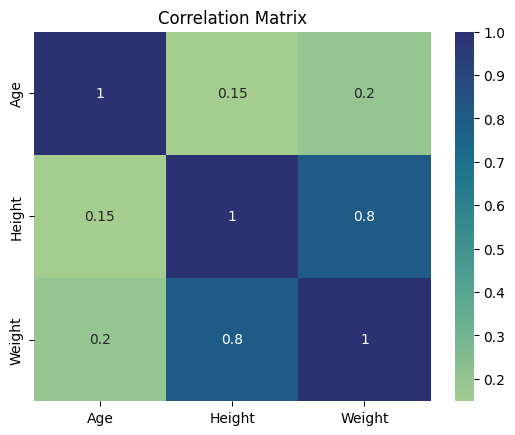

In [25]:
# Correlation
correlation = olympics_df[['Age','Height','Weight']].corr()
sns.heatmap(correlation, annot=True, cmap='crest')
plt.title("Correlation Matrix")
plt.show()


#### Observations: 

- Correlations between Age, Height and Weight are weak (<0.2).

- This means no single factor guarantees a medal outcome.

## Athelete Demographic distributions by Gender


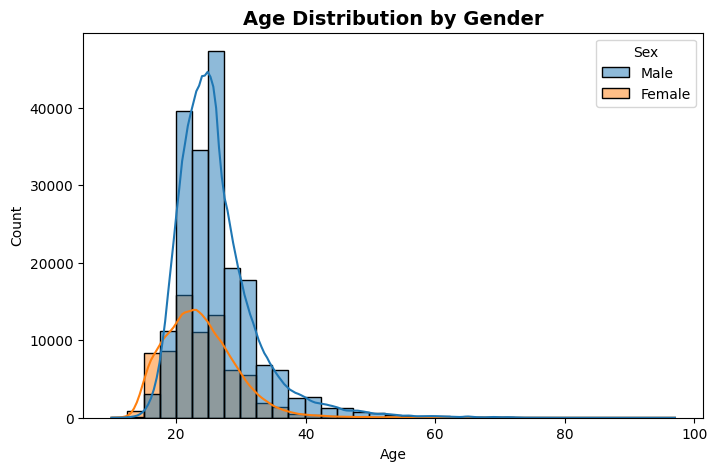

In [26]:
#Age distributions by Sex
plt.figure(figsize=(8,5))
sns.histplot(data=olympics_df, x='Age', hue='Sex', bins=35, kde=True)
plt.title("Age Distribution by Gender" , fontsize=14, fontweight="bold")
plt.show()

#### Observations:
- Male and female age distributions are very similar.

- Both peak in the mid-20s.

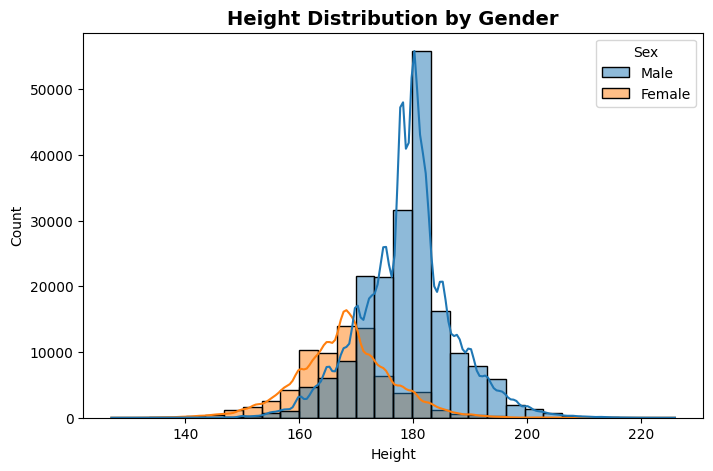

In [27]:
#Height distributions by Sex
plt.figure(figsize=(8,5))
sns.histplot(data=olympics_df, x='Height', hue='Sex', bins=30, kde=True)
plt.title("Height Distribution by Gender" , fontsize=14, fontweight="bold")
plt.show()

#### Observations:
- Males are generally taller than females.

- Female distribution is less spread.

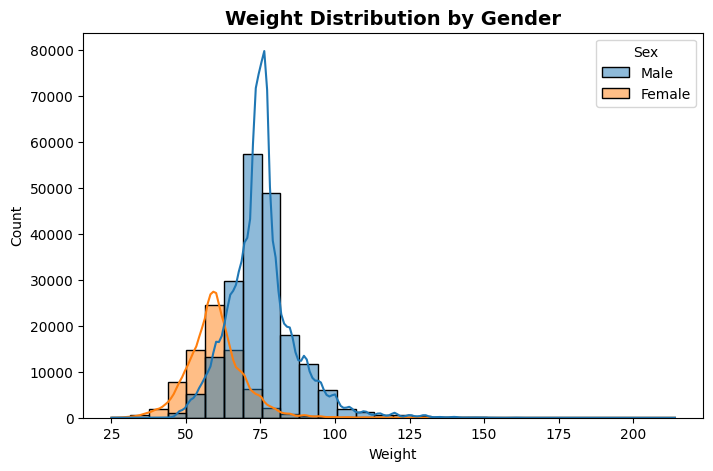

In [28]:
#Weight distributions by Sex
plt.figure(figsize=(8,5))
sns.histplot(data=olympics_df, x='Weight', hue='Sex', bins=30, kde=True)
plt.title("Weight Distribution by Gender" , fontsize=14, fontweight="bold")
plt.show()

#### Observations:

- Males are heavier on average.


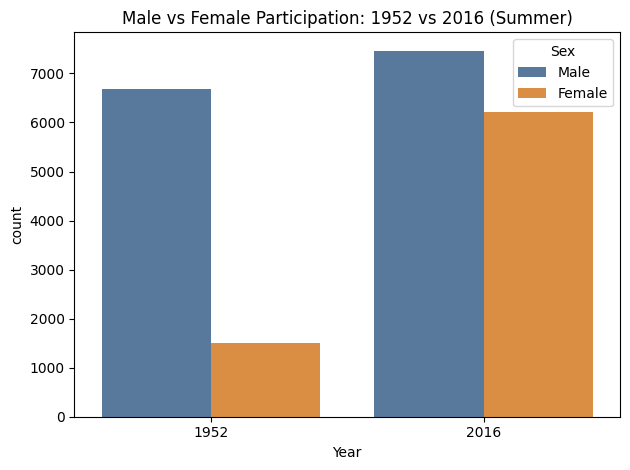

In [29]:
# Comparing the number of participation between 1952 and 2016

compare_years = olympics_df[(olympics_df['Year'].isin([1952,2016])) & (olympics_df['Season']=="Summer")]
sns.countplot(data=compare_years, x='Year', hue='Sex', palette = tableau_colors)
plt.title("Male vs Female Participation: 1952 vs 2016 (Summer)")
plt.tight_layout()
plt.show()


## Female Comaprision 

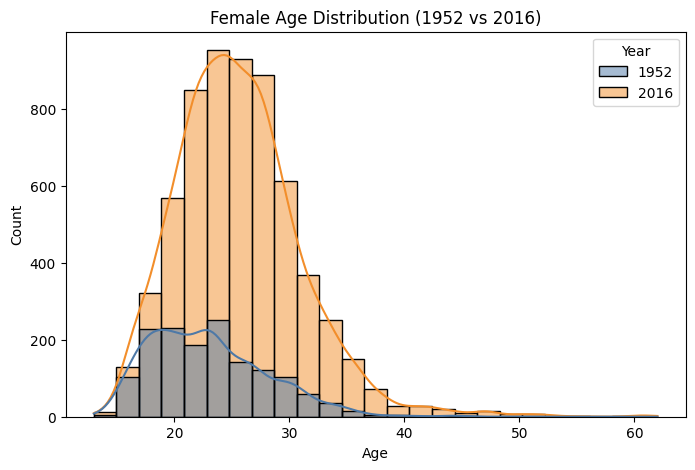

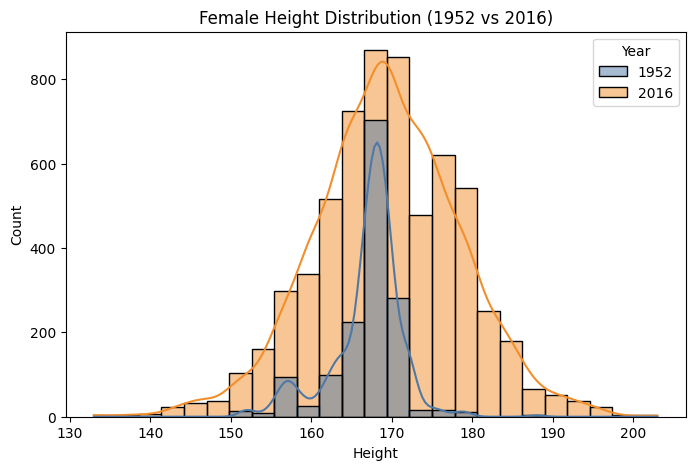

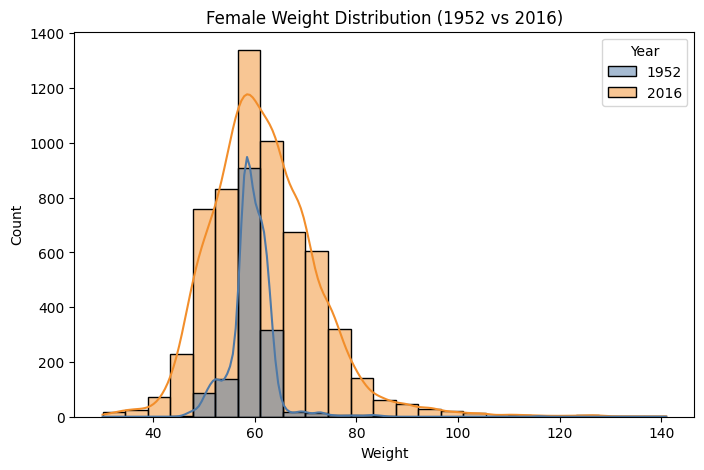

In [30]:
# Compare Female Demographic between 1952 and 2016

female_compare = olympics_df[
    (olympics_df['Year'].isin([1952, 2016])) & 
    (olympics_df['Season'] == "Summer") & 
    (olympics_df['Sex'] == "Female")
]
for demo in ['Age','Height','Weight']:
    plt.figure(figsize=(8,5))
    sns.histplot(data=female_compare, x=demo, hue='Year', kde=True, bins=25, palette=tableau_colors)
    plt.title(f"Female {demo} Distribution (1952 vs 2016)")
    plt.show()


In [31]:
female_summary = female_compare.groupby('Year')[['Age','Height','Weight']].median()
print(female_summary)



       Age  Height  Weight
Year                      
1952 22.00  168.00   59.00
2016 25.00  169.00   61.00


## Observation:
### Age

- Women in 1952 were mostly in their late teens/early 20s.

- By 2016, more were in their mid-to-late 20s.

### Height

- Average height went up from around 160s to 170s.

- The 2016 Olympics shows a wider range.

### Weight

- In 1952, most weighed around 55–65 kg.

- In 2016, it center shifted to 65–75 kg with more spread.

## Male Comparison

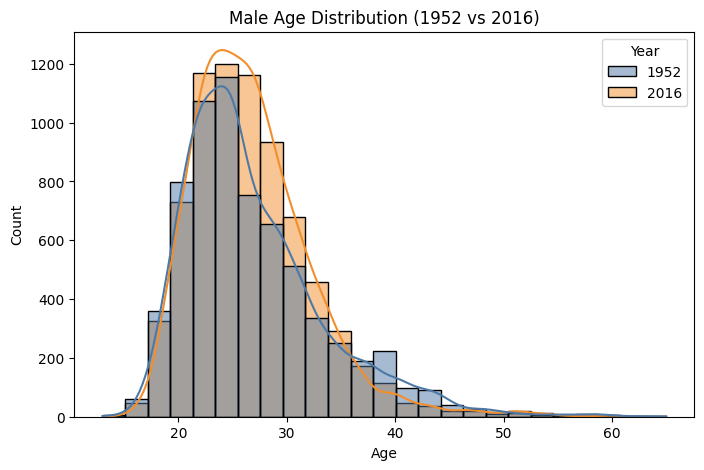

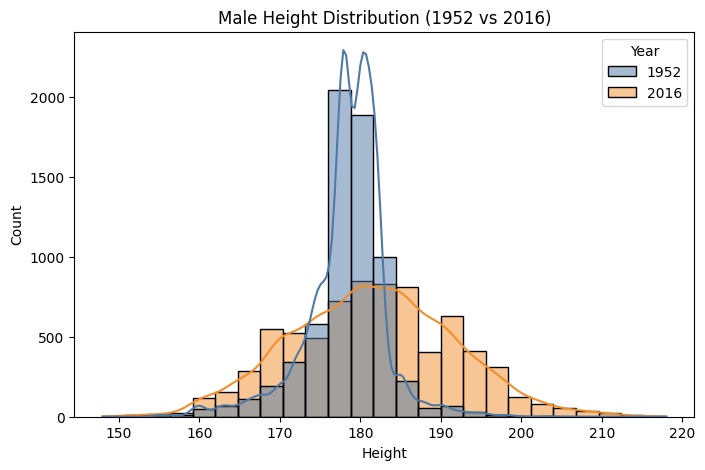

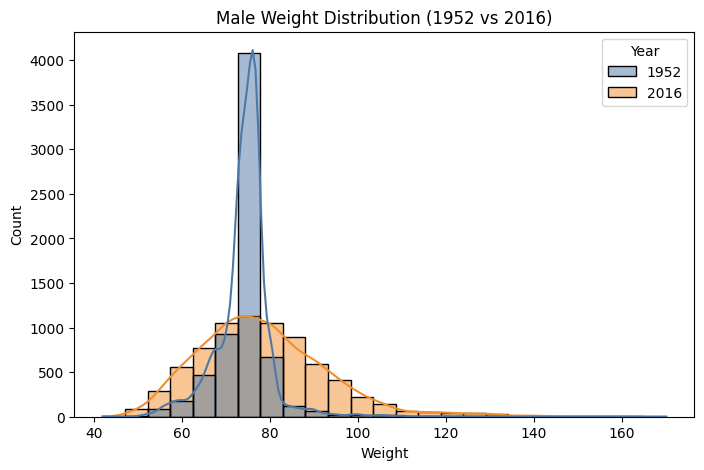

In [32]:
# Compare Male Demographic between 1952 and 2016


male_compare = olympics_df[
    (olympics_df['Year'].isin([1952, 2016])) & 
    (olympics_df['Season'] == "Summer") & 
    (olympics_df['Sex'] == "Male")
]
for demo in ['Age','Height','Weight']:
    plt.figure(figsize=(8,5))
    sns.histplot(data=male_compare, x=demo, hue='Year', kde=True, bins=25, palette=tableau_colors)
    plt.title(f"Male {demo} Distribution (1952 vs 2016)")
    plt.show()


In [33]:
Male_summary = male_compare.groupby('Year')[['Age','Height','Weight']].median()
print(Male_summary)


       Age  Height  Weight
Year                      
1952 25.00  178.00   75.00
2016 26.00  181.00   77.00


## Observation:
### Age

- In 1952, age peaked around 20–23 years old.

- In 2016, more were competing into their late 20s and 30s.

### Height

- The 1952 peak was ~175 cm.

- By 2016 it shifted closer to 180–185 cm.
### Weight

- In 1952, most weighed around 65–70 kg.

- In 2016, the center shifted to 75–80 kg with more spread.

## Athelete Attributes Distributions by Medal Types

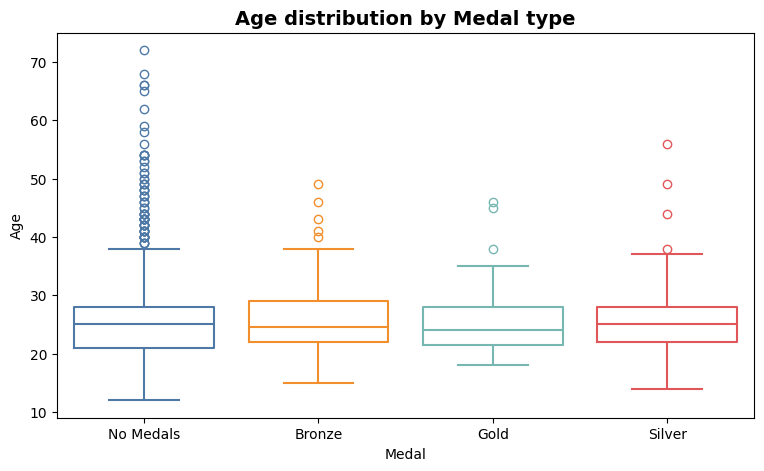

In [34]:
#Age distributions by Medal Types
plt.figure(figsize=(9,5))
sns.boxplot(data=olympics_df.sample(2000, random_state=1), x = 'Medal', y = 'Age', palette = tableau_colors, fill=False, native_scale = True)
plt.title('Age distribution by Medal type', fontsize=14, fontweight='bold')
plt.show()


#### Observations:
- Medalists cluster around mid-20s, while non-medal athletes show a wider spread

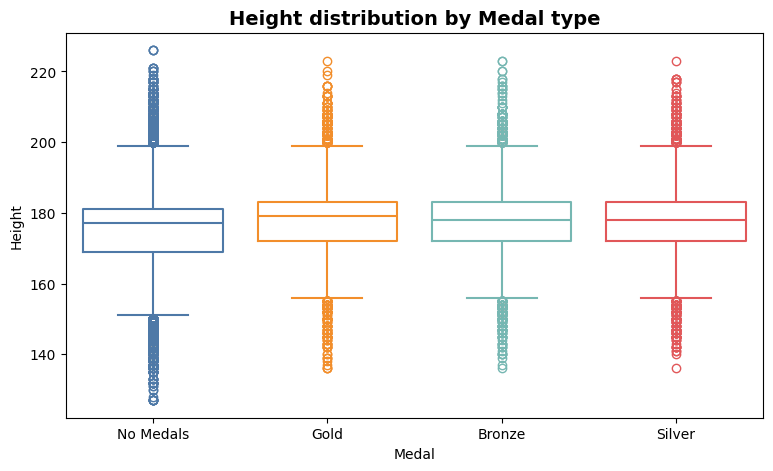

In [35]:
plt.figure(figsize=(9,5))
sns.boxplot(data=olympics_df, x='Medal', y='Height', palette=tableau_colors, fill=False, native_scale = False)
plt.title('Height distribution by Medal type', fontsize=14, fontweight='bold')
plt.show()


# Observations:
- Medalists across all levels tend to be taller on average than non-medal athletes.


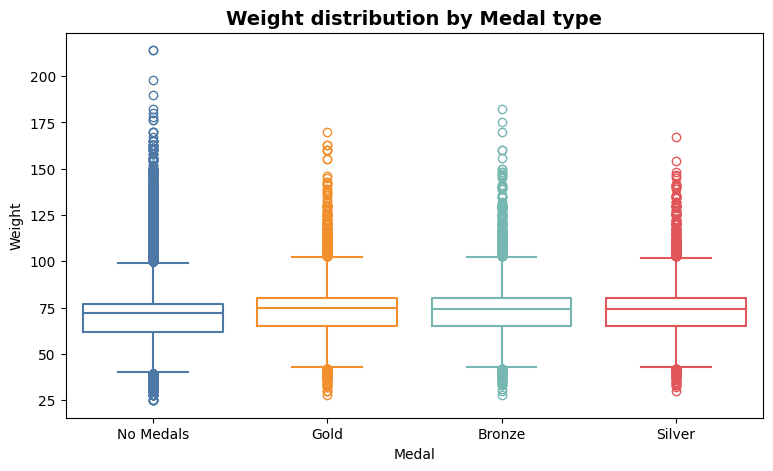

In [36]:
plt.figure(figsize=(9,5))
sns.boxplot(data=olympics_df, x='Medal', y='Weight', palette=tableau_colors, fill=False, native_scale = True)
plt.title('Weight distribution by Medal type', fontsize=14, fontweight='bold')
plt.show()


#### Observations:
- Medalists weights are a bit more balanced, clustering around 70–80 kg

---

# Male vs Female Participation

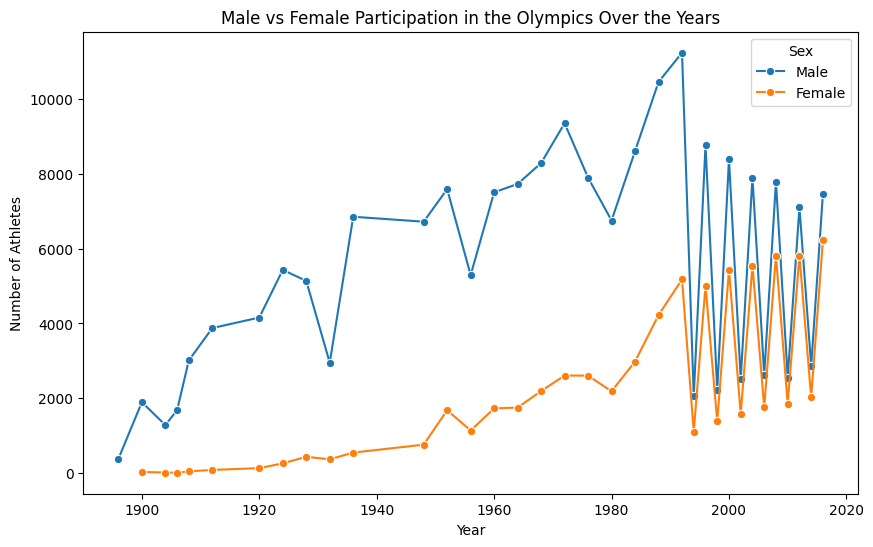

In [37]:
# Count male vs female participants by year
participation = olympics_df.groupby(['Year','Sex']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.lineplot(data=participation, x='Year', y='count', hue='Sex', marker='o')
plt.title("Male vs Female Participation in the Olympics Over the Years")
plt.ylabel("Number of Athletes")
plt.xlabel("Year")
plt.show()


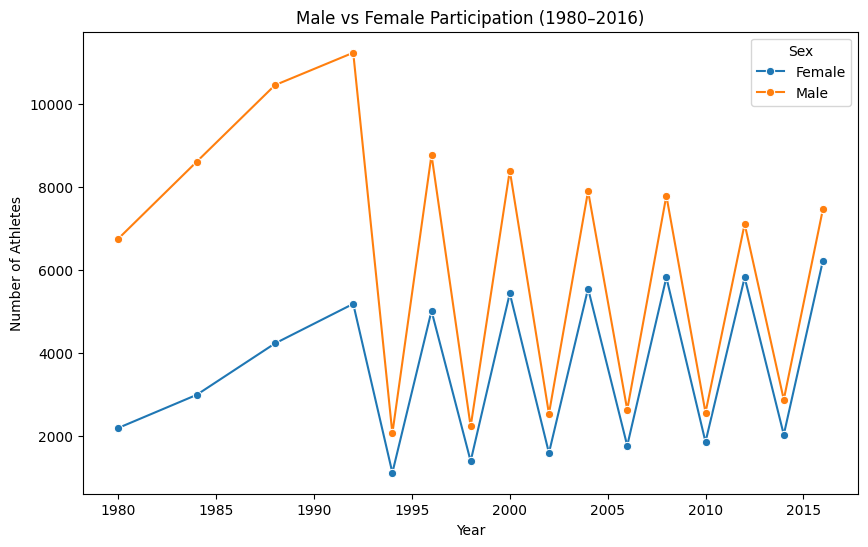

In [38]:
# Zoomed-in plot

participation_between_1980_2016 = participation[
    (participation['Year'] >= 1980) & (participation['Year'] <= 2016)
]


plt.figure(figsize=(10,6))
sns.lineplot(data=participation_between_1980_2016, x='Year', y='count', hue='Sex', marker='o')
plt.title("Male vs Female Participation (1980–2016)")
plt.ylabel("Number of Athletes"); plt.xlabel("Year")
plt.show()


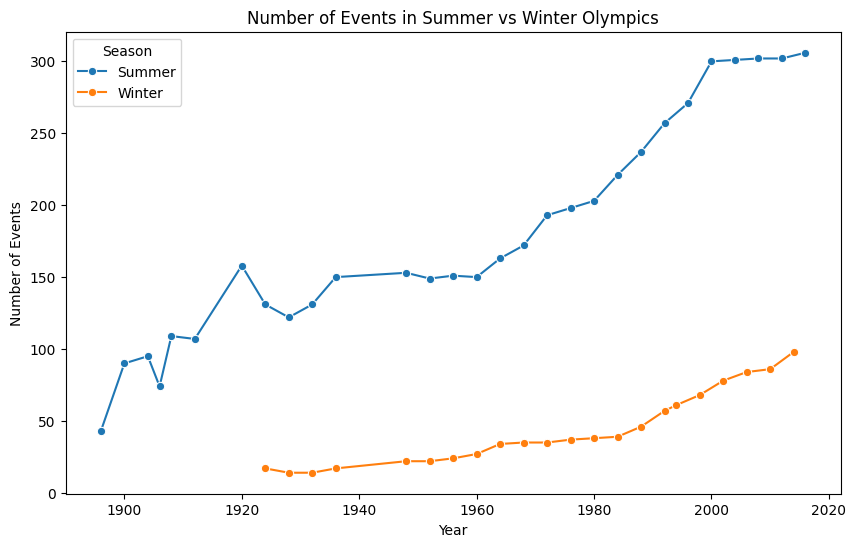

In [39]:
season_events = olympics_df.groupby(['Year','Season'])['Event'].nunique().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=season_events, x='Year', y='Event', hue='Season', marker='o')
plt.title("Number of Events in Summer vs Winter Olympics")
plt.ylabel("Number of Events")
plt.xlabel("Year")
plt.show()

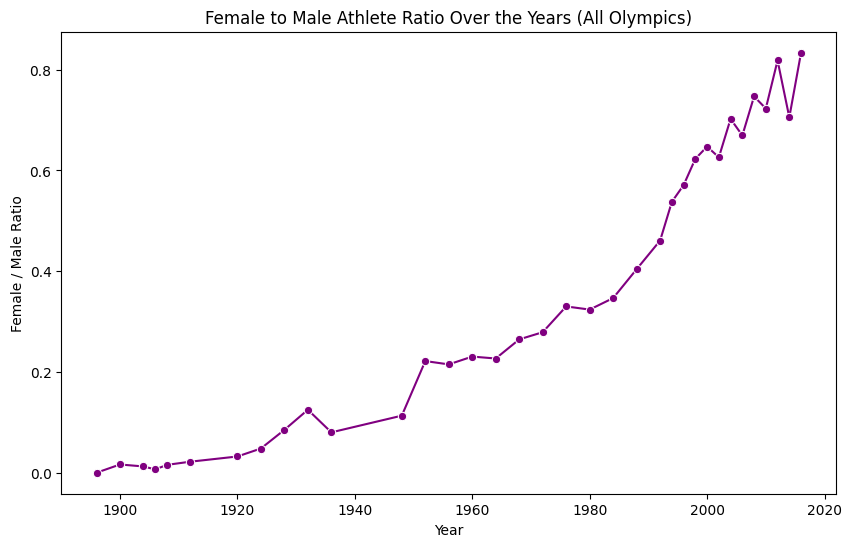

In [40]:
# Count male vs female participants by year
gender_participation = olympics_df.groupby(['Year','Sex']).size().reset_index(name='count')

# Pivot so Male and Female are columns
gender_ratio = gender_participation.pivot(index='Year', columns='Sex', values='count').fillna(0).reset_index()

# Calculate Female-to-Male ratio
gender_ratio['Female_to_Male_Ratio'] = gender_ratio['Female'] / gender_ratio['Male']



# Plot Female/Male ratio over time
plt.figure(figsize=(10,6))
sns.lineplot(data=gender_ratio, x='Year', y='Female_to_Male_Ratio', marker='o', color="purple")
plt.title("Female to Male Athlete Ratio Over the Years (All Olympics)")
plt.ylabel("Female / Male Ratio")
plt.xlabel("Year")
plt.show()


---

In [41]:
# Save the Cleaned Data into new csv

olympics_df.to_csv("..\\Data\\Cleaned Data\\cleaned.csv", index=False)

## Summary
__Summarizing the key insights from the analysis__

**Note**: _Use Bullet Points_

    ...

## Recommendations/Conclusion
**Note**: _Use Bullet Points_

    ...